# **Lab 2: Fourier Transform**

Author: Zheng Xinzhe, Zhang Xie

Slides:

Videos: https://www.youtube.com/watch?v=h7apO7q16V0, 
https://www.youtube.com/watch?v=nmgFG7PUHfo

(It is highly recommended to watch the videos before you start this lab.)

Objectives:
* Understand the key insight of ***Fourier Transform***.
* Know how ***Discrete Fourier Transform*** works.
* Be capable of using ***Fourier Transform*** to solve some problems.

If any questions, please contact the TAs via HKU moodle, or email.

Rules:
* 1) This lab consists of three parts. The first part describes the history of ***Fourier Transform***, why and how we transfer this algorithm from analog signals to digital signals. The Second part is all about ***Fast Fourier Transform***, which greatly improves the efficiency of ***Discrete Fourier Transform***. You are required to finish the algorithm with python code. The third part is a big task, you will use ***Fourier Transform*** to detect breathing rate of persons.
* 2) When you see the symbol of "# YOUR CODE HERE" and "# END OF YOUR CODE", you should finish corresponding tasks.
* 3) The score corresponding to the question is indicated next to each question.

In [407]:
# Before this lab journey, please enter your name and student ID
NAME = "Kang, Zheming"
ID = "3036195746"

## 1. Fourier Transform

In this section, we will introduce the ***Fourier Transform*** step by step. We will start from why we need ***Fourier Transform***, and how it works in the analog (continious in time domain) condition. Then we will introduce the ***Discrete Fourier Transform***, which has been widely used in signal processing for decades. After that, we will go inside into the ***Discrete Fourier Transform*** algorithm, and see how it works.

Let's start our journey!

### 1.1 Fourier Series

*Fourier analysis* originated from the study of trigonometric functions ($\cos, \sin$). Before Fourier, it had long been recognized that complicated periodic signals could be represented by trigonometric functions. Even in ancient Babylon and Egypt, people used this method to predict astronomical events. In the modern history of science, the great mathematician Euler in the eighteenth century brought this method back into people's view. When he was studying the propagation of sound waves, he discovered that it was possible to decompose the propagation function into the sum of sinusoidal functions. These discoveries and applications laid the founddation for the rest work of Fourier.

What Fourier proposed first was ***Fourier Series***, whose main idea is that any periodic function can be represented by a sum of sinusoidal functions.

Let's take rectangular periodic function as an example, and then analyze its mathematical expression.

In [408]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square
from scipy.integrate import simps

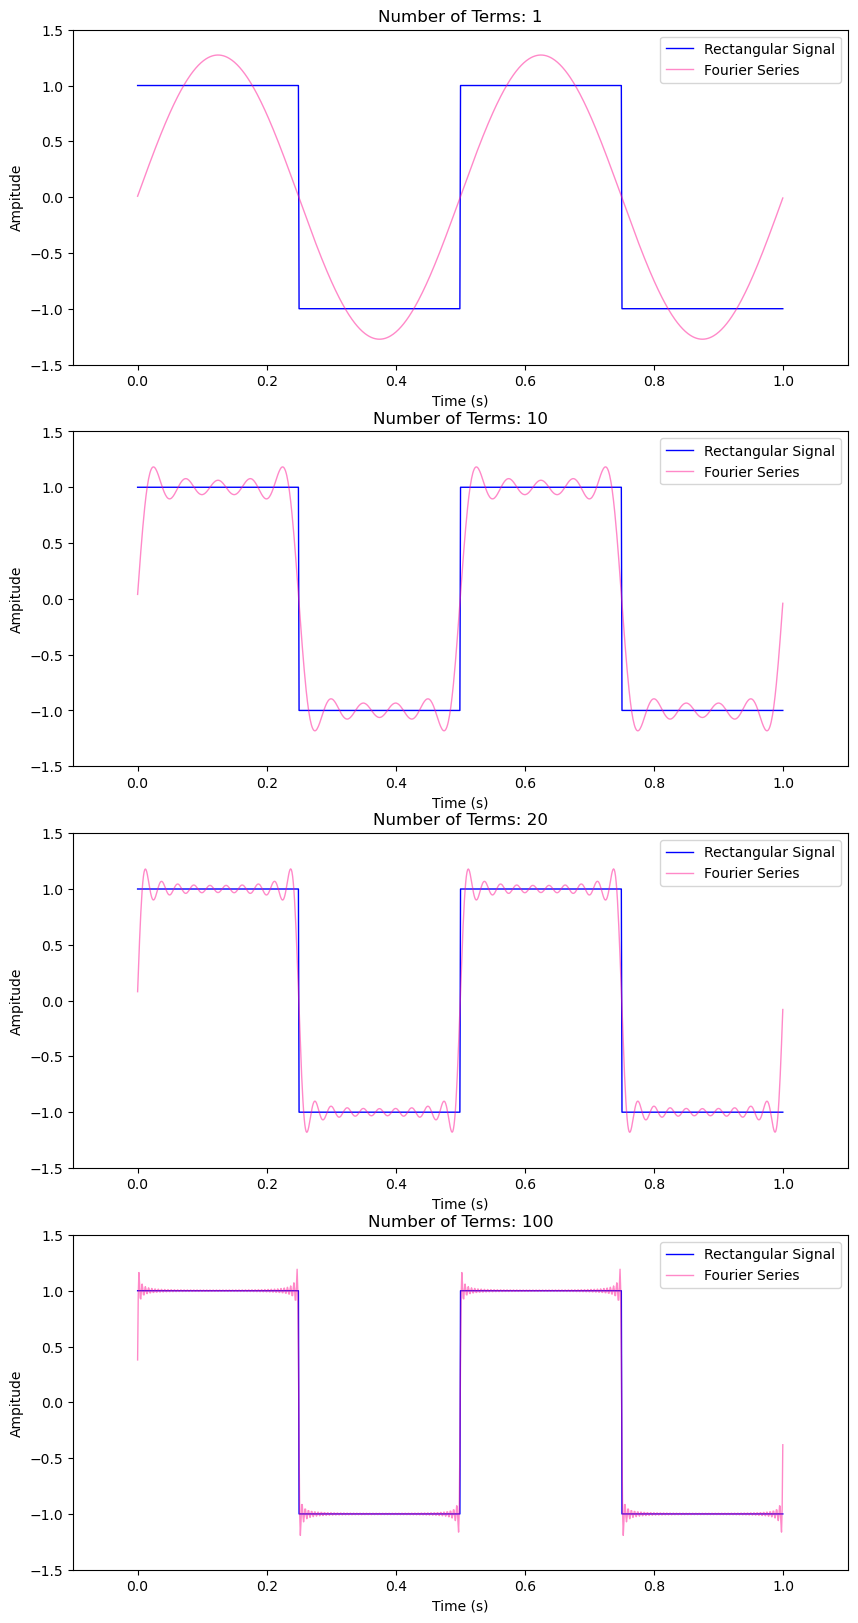

In [409]:
class RectangularSeries(object):
	"""
	Description
	Generate a rectangular series

	Params:
		self.times_lst: list
			time sampling list
		self.time_length: float
			time duration
		self.freq_tot: int
			total frequency of the rectangular series
	"""
	def __init__(self,
				time_start:float,
				time_end:float,
				freq_tot:float,
				num_samples:int):
		"""
		Params:
			time_start: float
			time_end: float
			freq_tot: float
			num_samples: int
		"""
		self.times_lst = np.linspace(time_start,
									 time_end,
									 num_samples,
									 endpoint=False)
		self.time_length = time_end - time_start
		self.freq_tot = freq_tot
		self.real_signals_lst = self.get_real_signals_lst()

	def get_real_signals_lst(self):
		real_signals_lst = square(2*np.pi * self.freq_tot * self.times_lst,
								  duty=0.5)
		return real_signals_lst

class FourierSeries(object):
	"""
	Description
	Fourier Series
	"""

	def __init__(self,
				time_start:float,
				time_end:float,
				freq_tot:float,
				num_samples:int,
				num_terms:int,
				real_signals:np.array):
		"""
		Params:
			time_start: float
			time_end: float
			freq_tot: float
			num_samples: int
			num_terms: int
				The number of terms in the Fourier series
		"""
		self.times_lst = np.linspace(time_start,
									time_end,
									num_samples,
									endpoint=False)
		self.time_length = time_end - time_start
		self.freq_tot = freq_tot
		self.real_signals_lst = real_signals
		self.num_terms = num_terms

	def get_simu_signals_lst(self):
		a_0 = self.get_a_0()
		simu_signals_lst = a_0 / 2

		for idx_term in range(1, 1+self.num_terms):
			a_k = self.get_a_n(idx_term)
			cos_kwt = self.get_cos_nwt(idx_term)
			b_k = self.get_b_n(idx_term)
			sin_kwt = self.get_sin_nwt(idx_term)
			simu_signals_lst += (a_k * cos_kwt + b_k * sin_kwt)

		return simu_signals_lst

	def get_a_0(self):
		a_0 = 2 / self.time_length * simps(self.real_signals_lst,
										   self.times_lst)
		return a_0

	def get_a_n(self, n):
		a_n = 2 / self.time_length * simps(self.get_cos_nwt(n) * self.real_signals_lst,
										   self.times_lst)
		return a_n

	def get_b_n(self, n):
		b_n = 2 / self.time_length * simps(self.get_sin_nwt(n) * self.real_signals_lst,
										   self.times_lst)
		return b_n

	def get_cos_nwt(self, n:int):
		return np.cos( n * 2*np.pi*self.freq_tot/self.time_length * self.times_lst )

	def get_sin_nwt(self, n:int):
		return np.sin( n * 2*np.pi*self.freq_tot/self.time_length * self.times_lst )


def plot_difference(times_lst:list,
					real_signals_lst:list,
					simu_signals_lst:list,
					number_of_terms:int,
					number:int,
					total_number:int,
					time_start:float,
					time_end:float,):
	plt.subplot(total_number, 1, number)

	plt.plot(times_lst, real_signals_lst,
			 color="blue",
			 lw="1",
			 label="Rectangular Signal")
	plt.plot(times_lst, simu_signals_lst,
			 color="deeppink",
			 alpha=0.5,
			 lw="1",
			 label="Fourier Series")

	#plt.axis('equal')
	plt.xlim(time_start-0.1, time_end+0.1)
	plt.ylim(-1.5, 1.5)
	plt.legend()
	plt.xlabel("Time (s)")
	plt.ylabel("Ampitude")
	plt.title("Number of Terms: {0}".format(number_of_terms))

# Calculate Fourier Series
time_start = 0
time_end = 1
freq_tot = 2
num_samples = 1000
num_terms = [1, 10, 20, 100]

# Plot the difference between the real signal and the Fourier series
plt.figure(figsize=(10, 20))
for i in range(len(num_terms)):
	rectengular_series = RectangularSeries(time_start=time_start,
										   time_end=time_end,
										   freq_tot=freq_tot,
										   num_samples=num_samples)
	real_signals_lst = rectengular_series.get_real_signals_lst()
	fourier_series = FourierSeries(time_start=time_start,
								   time_end=time_end,
								   freq_tot=freq_tot,
								   num_samples=num_samples,
								   num_terms=num_terms[i],
								   real_signals=real_signals_lst)
	times_lst = fourier_series.times_lst
	simu_signals_lst = fourier_series.get_simu_signals_lst()
	plot_difference(times_lst=times_lst,
					real_signals_lst=real_signals_lst,
					simu_signals_lst=simu_signals_lst,
					number_of_terms=num_terms[i],
					number=i+1,
					total_number=len(num_terms),
					time_start=time_start,
					time_end=time_end)

The above picture shows a rectangular periodic function and its corresponding Fourier Series with different terms. Obviously, the more terms we add, the more accurate the approximation is.

It should be noticed that there exists a peak of the Fourier series at the discontinuous point of the rectangle function. This phenomenon is called ***Gibbs Phenomenon***. If you are interested in this phenomenon, you can view this website: https://en.wikipedia.org/wiki/Gibbs_phenomenon, or read related paper: https://www.jstor.org/stable/2132695#metadata_info_tab_contents.

Now let's see how to calculate the Fourier Series of a periodic function in a mathematical way.

First, we need to define the ***Fourier Series*** of a periodic function $f_T(t)$ as follows:

$$f_T(t) = \sum_{n=0}^{\infty} a_n\cos(n\frac{2\pi}{T}t) + b_n \sin(n\frac{2\pi}{T}t)$$

where $T$ is the maximum period of the periodic function $f_T(t)$, and $\omega=\frac{2\pi}{T}$ is the angular frequency of the periodic function $f_T(t)$. $a_n$ and $b_n$ are the ***Fourier Coefficients*** of the periodic function $f_T(t)$. They can be calculated as follows:

$$a_n = a\int_{-T/2}^{T/2} f_T(t)\cos(n\frac{2\pi}{T}t)dt; n=0,a=\frac{1}{T};n>0,a=\frac{2}{T}$$
$$b_n = b\int_{-T/2}^{T/2} f_T(t)\sin(n\frac{2\pi}{T}t)dt; n>0,b=\frac{2}{T}$$

Thus, we can use a sequence of sinusoidal functions to approximate a periodic function, and if the sequence length is infinite, the approximation is absolutely equal to the original function. The prove of this theorem is not required in this course, so we will just use a simple explanation to make you understand the idea of ***Fourier Series*** from high level.

Why will the above equation work? Obviously, the maximum period $T$ of a periodic function is the least common multiple of all its periodic components. Thus, a sequence of sinusoidal functions ($\cos(n\frac{2\pi}{T}t), \sin(n\frac{2\pi}{T}t)$) will cover all the periodic components of the periodic function $f_T(t)$, and the approximation will be accurate.

However, in real world scenarios, most of the signals are not periodic, thus we can't use ***Fourier Series*** to analyze them. So we need to find a way to analyze non-periodic signals. This is where ***Fourier Transform*** comes in.

### 1.2 Fourier Transform



Although ***Fourier Series*** contains infinite terms, its frequency component set is countable. This is because the frequency components are discrete. However, in real world scenarios, the frequency components of a signal could be any point on the set of real numbers. Thus, we need to find a way to analyze signals with all possible frequency components. This is where ***Fourier Transform*** comes in.

Based on **Euler formula**: $e^{j\omega t}=\cos(\omega t) + j\sin(\omega t)$, we can just use $e^{j\omega t}$ to represent each frequency component of a signal. But how to obtain its corresponding amplitude? Quite simple, just do the same integration as ***Fourier Series***, and you will get the following equation:

$$F(\omega) =\int_{-\infty}^{\infty} f(t)e^{-j\omega t}dt$$

where $F(\omega)$ is the ***Fourier Transform*** of the signal $f(t)$, and $\omega$ is the frequency of the signal $f(t)$. It should be noticed that the integration range is from $-\infty$ to $\infty$, which is because the signal is non-periodic. Also, the integration result is a complex number, which contains both the amplitude and phase (offset in time domain) of the frequency component $\omega$.

So given a specific frequency component $\omega_o$, you could obtain its corresponding amplitude $F(\omega_o)$ by the above equation, which denotes how percentage of this frequency component is in the signal $f(t)$.

Let's take $f(t)=e^{-x^2}$ as an example, and see how the ***Fourier Transform*** works.

In [410]:
# import fourier_transform
from sympy import fourier_transform, exp
from sympy.abc import x, k

# Define the function
f = exp(-x**2)

# Calculate the Fourier transform
F = fourier_transform(f, x, k)

# Print the result
print(F)

sqrt(pi)*exp(-pi**2*k**2)


Thus, we obtain the result of ***Fourier Transform***: $F(\omega)=\sqrt{\pi}e^{-\pi^2 \omega^2}$.

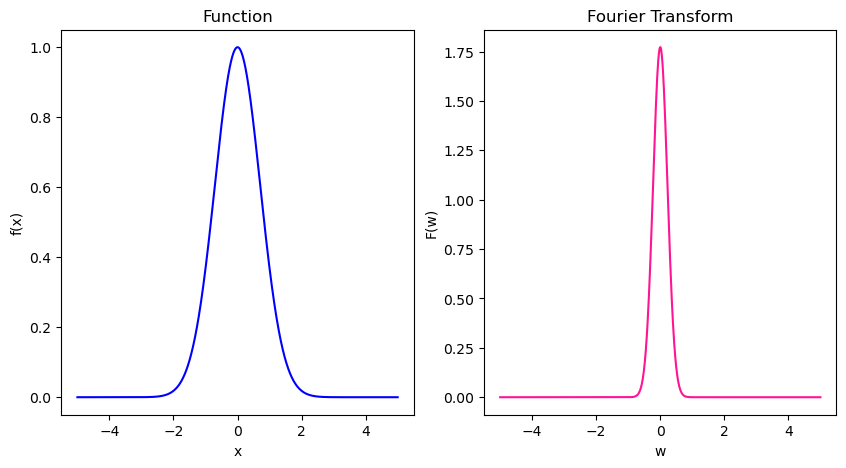

In [411]:
# Plot function and Fourier transform
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x):
	return np.exp(-x**2)

# Define the Fourier transform
def F(k):
	return np.sqrt(np.pi) * np.exp(-k**2 * np.pi**2)

# Define the range of x and k
x_range = np.linspace(-5, 5, 1000)
k_range = np.linspace(-5, 5, 1000)

# Plot the function and the Fourier transform
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_range, f(x_range), color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function")
plt.subplot(1, 2, 2)
plt.plot(k_range, F(k_range), color="deeppink")
plt.xlabel("w")
plt.ylabel("F(w)")
plt.title("Fourier Transform")
plt.show()

One problem solved, but another problem occurs. The ***Fourier Transform*** could only be applied to continuous signals, which means that the signal should have an analytic expression, which is impossible in real world scenarios. In general cases, the signal stored in computer is discrete, which means that the signal is sampled from a continuous signal. (When we plot a signal in our lab, we need to sample the signal.) So, how things will be different if we use ***Fourier Transform*** on a discrete signal? Let's move on to the next section to find out the answer.

### 1.3 Discrete Fourier Transform (0.5 point)

What is the relationship between the discrete Fourier transform and the continuous Fourier transform? We may need some supplementary information to move on. let me introduce the concept of **sampling**, and the sampling function $\delta(t)$.

The sampling function $\delta(t)$ is a function that is zero everywhere except at $t=0$, and its value is infinite at $t=0$. It is also called the **Dirac delta function**. And this function as the following property:

$$\int_{-\infty}^{\infty} \delta(t-\tau)dt = 1, \ \tau \in \mathbb{R}$$
$$\int_{-\infty}^{\infty} \delta(t-\tau)e^{-j\omega t}dt = e^{-j\omega \tau}, \ \tau \in \mathbb{R}$$

As for the sampling process, usually we will have the concept of sampling frequency $f_s=\frac{1}{T}$, which is the number of samples per second. And the sampling period $T$ is the inverse of the sampling frequency, which is the time duration between two adjacent samples. And also, we will have the sampling signal length $N$, which is the number of samples in the sampled signal, and the time length of the sampled signal is $L=N\cdot T$.

Alright, so when we apply the sampling function to a continuous signal $f(t)$, we will get the result:

$$f_{{\rm{sample}}}(t)=f(t)\sum_{n=0}^{N-1}\delta(t-nT)=\sum_{n=0}^{N-1}f(nT)\delta(t-nT)$$

and its Fourier transform is:

$$F_{{\rm{sample}}}(\omega)=\int_{-\infty}^{\infty} \sum_{n=0}^{N-1}f(nT)\delta(t-nT)e^{-j\omega t}dt=\sum_{n=0}^{N-1} \int_{-\infty}^{\infty}f(nT) \delta(t-nT)e^{-j\omega t}dt=\sum_{n=0}^{N-1}f(nT)e^{-jnT\omega}$$

Now we obtain the ***Discrete Time Fourier Transform*** of the sampled signal $f_{{\rm{sample}}}(t)$, but it's still continuous in frequency domain. Next, the frequency domain signal is converted into a finite length discrete signal. Similar to the processing of time domain signal, the frequency domain signal is assumed to be band-limited, and after discretization, the finite length discrete signal can be obtained. According to Nyquist sampling theorem ($f_s>2f_{\rm{max}}$), if sampling in the frequency domain can completely reconstruct the original signal, the frequency domain signal $F_{{\rm{sample}}}(\omega)$ should be limited in the range of $[0,\frac{1}{2T}]$. Since the time domain signal is limited to $[0,L]$, the sampling interval in the frequency domain should be $\frac{1}{L}$ according to the sampling theorem and the relation of time-frequency duality. Therefore, the number of sampling points in the frequency domain is:

$$\frac{1/{T}}{1/L}=N$$

The frequency domain sampling point is $p_k=2\pi k/NT, k\in[0,N] \wedge k\in \mathbb{Z}^+$, so the above equation can be further written as:

$$X[k]=\sum_{n=0}^{N-1}x[nT]e^{-j\frac{2\pi n}{N}k}=\sum_{n=0}^{N-1}x[nT]\omega_{N}^{nk}$$

This is the ***Discrete Fourier Transform*** of the sampled signal $f_{{\rm{sample}}}(t)$.

You may have a lot of questions when you look at the above meterials, and you may not immediately understand why the time-frequency conversion is the way it is. The two video links at the beginning may help you achieve some answers, but it doesn't matter if you don't know much about the derivation of these formulas, this course is not a signal processing course. The purpose of this Lab is to make you understand as much as possible the relationship between these important signal processing methods and how to use them.

Let's move on and see how to use the ***Discrete Fourier Transform*** to analyze the signal.
![DFT](https://pythonnumericalmethods.berkeley.edu/_images/24.02.02-time_frequency.png "DFT")

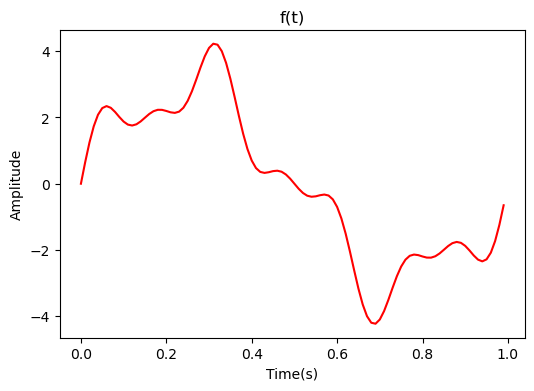

In [412]:
# sampling rate
sr = 100
# time length
tl = 1.0
# sampling interval
ts = 1/sr

t = np.arange(0,tl,ts)

# Generate signal (f(t))
freq = [1, 4, 7]
x = 3*np.sin(2*np.pi*freq[0]*t) + np.sin(2*np.pi*freq[1]*t) + 0.5* np.sin(2*np.pi*freq[2]*t)

plt.figure(figsize = (6, 4))
plt.plot(t, x, 'r')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("f(t)")
plt.show()

In [413]:
# Define Discrete Fourier Transform function
# YOUR CODE HERE
def DFT(x):
	# The length of the sequence
	N = len(x)
	# Fulfil Discrete Fourier Transform
	
	# X is the result of Discrete Fourier Transform
	X = np.zeros(N, dtype=complex)
	for k in range(N):
		for n in range(N):
			X[k] += x[n]*np.exp(-1j*2*np.pi*k*n/N)

	return X
# END OF YOUR CODE

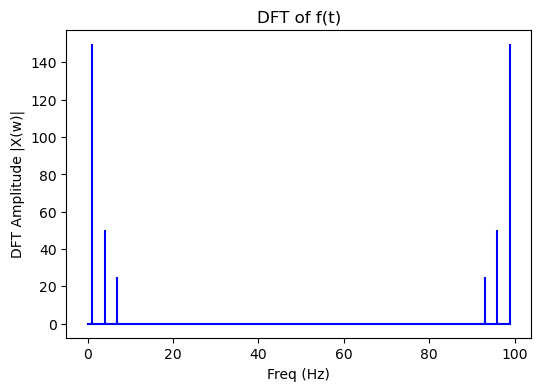

In [414]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (6, 4))
plt.stem(freq, abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(w)|')
plt.title("DFT of f(t)")
plt.show()

We can see from this that the DFT output is symmetric at half the sampling rate. The Nyquist frequency, also known as the folding frequency, is named after the electronic engineer Harry Nyquist. The Nyquist-Shannon sampling theorem states that a signal sampled at a rate can be fully reconstructed if it contains only frequency components below half that sampling frequency, and thus the highest frequency output from the DFT is half the sampling rate. So we only need the first half of the DFT output to reconstruct the signal.

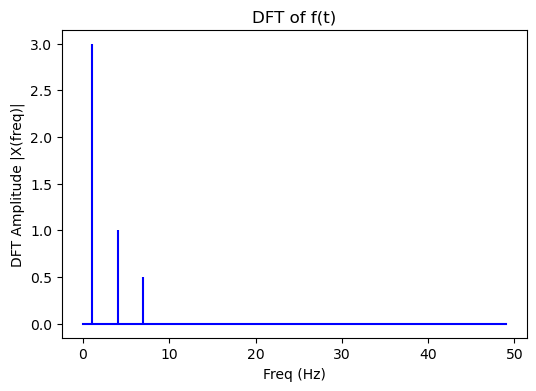

In [415]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (6, 4))
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.title("DFT of f(t)")
plt.show()

We have obtained three frequency components: 1 Hz, 4 Hz, and 7Hz

The ***Discrete Fourier Transform*** is absolutely a very powerful tool, however, its computation complexity is very high, which is $O(N^2)$, and it is not suitable for large-scale signal processing. So, we need to find a way to reduce the computation complexity. ***Fast Fourier Transform***, which is the fast version of ***Discrete Fourier Transform***, will be part of your task in this Lab.

## 2. Fast Fourier Transform (1 point)

By the end of the first part of the experiment, I believe you have a full understanding of the ***Discrete Fourier Transform***. Let's do some further exercises and finish writing the ***Fast Fourier Transform*** algorithm.

The total point of this part is 1 point.

#### 2.1 Fast Fourier Transform Algorithm (0.5 point)

There is an anecdote about the origin of the ***Fast Fourier transform***. During the Cold War, in an effort to limit the unlimited expansion of nuclear weapons, there were rules banning nuclear tests in the deep sea and in the air (because they could easily be detected by other countries).

But there is another way for nuclear tests to be carried out, very deep under the earth's surface, so why does the clause not restrict states from conducting tests in this way? With computers at the time, scientists had no way to detect such a test.

Nuclear tests conducted underground often produce seismic waves that are different in frequency from those normally generated by crustal movements. So the usual approach is to analyze the time sequence of seismic waves through the discrete Fourier transform. But the time complexity of the discrete Fourier transform is $O(N^2)$, which means that as time goes on, the number of operations is going to double. This was too much work for the computers of that time. Thus, through most of the Cold War, the great powers continued to conduct nuclear tests secretly.

Finally in 1963, Cooley and Tukey proposed the fast Fourier transform algorithm, reducing the time complexity of the discrete Fourier transform from a to $O(N\log N)$.

So, how does the ***Fast Fourier Transform*** algorithm work? In ***Discrete Fourier Transform***, we need to do a total of $N^2$ times of complex multiplication, but if it's necessary to calculate them all. Before we start, let's first look at some special properties of $\omega_{N}^{nk}=e^{-j\frac{2\pi n}{N}k}$. **(Notification: All of the sequence number is the power of two.)**

**1)** $\omega_{2N}^{n2k}=\omega_{N}^{nk}$

**2)** $\omega_{N}^{nk}=(-1)^n\omega_{N}^{n(k+\frac{N}{2})}$

The first property means that we can devide the calculation into two parts. The second property means that $\omega_{N}^{nk}$ can be treated in a periodic way.

So naturally, the formula for the ***Discrete Fourier Transform*** is divided into odd and even parts, Thus we obtain:

$$X[k]=\sum_{m=0}^{N/2-1}x[2m]e^{-j\frac{2\pi 2m}{N}k}+\sum_{m=0}^{N/2-1}x[2m+1]e^{-j\frac{2\pi (2m+1)}{N}k}$$
One common factor can then be extracted, and the above formula can be written as:
$$X[k]=\sum_{m=0}^{N/2-1}x[2m]e^{-j\frac{2\pi 2m}{N}k}+e^{-j\frac{2\pi}{N}k}\sum_{m=0}^{N/2-1}x[2m+1]e^{-j\frac{2\pi 2m}{N}k}$$
$$X[k]=E_k + e^{-j\frac{2\pi}{N}k} O_k$$
Here $E_k$ denotes the even-indexed inputs of ***Discrete Fourier Transform***, and $O_k$ denotes the odd-indexed inputs of ***Discrete Fourier Transform***.

And don't forget we can treat $X[k]$ in a periodic way.
$$
\begin{split}
X[k+\frac{N}{2}]&=\sum_{m=0}^{N/2-1}x[2m]e^{-j\frac{2\pi 2m}{N}(k+\frac{N}{2})}+e^{-j\frac{2\pi}{N}(k+\frac{N}{2})}\sum_{m=0}^{N/2-1}x[2m+1]e^{-j\frac{2\pi 2m}{N}(k+\frac{N}{2})} \\ 
&=E_k - e^{-j\frac{2\pi}{N}k} O_k
\end{split}
$$

And finally, we obtain the formulas:
$$X[k]=E_k + e^{-j\frac{2\pi}{N}k} O_k$$
$$X[k+\frac{N}{2}]=E_k - e^{-j\frac{2\pi}{N}k} O_k$$

$E_k$ and $O_k$ can be further devided to make the calculation easier. After all of this work, we finally get the ***Fast Fourier Transform*** algorithm, the following picture shows how ***Fast Fourier Transform*** works when $N=8$.
![FFT](https://upload.wikimedia.org/wikipedia/commons/4/4d/DIT_N8_ALL.JPG "FFT")

So we first separate the sequence into even and odd groups, and then the index in the new group is divided by parity again. Essentially, the ***Fast Fourier Transform*** is a recursive divide-and-conquer algorithm.

The pseudocode of ***Fast Fourier Transform*** is given below:

```python
X[0,1,...,N-1] ← fft2(x, N):
	if N = 1 then
		X[0] ← x[0]
	else
		X[0,...,N/2−1] ← fft2(x[even], N/2)
		X[N/2,...,N−1] ← fft2(x[odd], N/2)
		for k = 0 to N/2−1 do
			p ← X[k]
			q ← exp(−2πi/N*k)*X[k+N/2]
			X[k] ← p + q
			X[k+N/2] ← p − q
		end for
	end if
```

Please translate the pseudocode into Python code and complete the ***Fast Fourier Transform*** algorithm.

In [416]:
# Fast Fourier Transform

# YOUR CODE HERE
def FFT(x, N):

	if N == 1:
		return x
	else:
		
		# Fulfill Fast Fourier Transform
		even = [x[i] for i in range(0, N, 2)]
		odd = [x[i] for i in range(1, N, 2)]
		# X is the result of Fast Fourier Transform
		X = np.zeros(N, dtype=complex)
		X[0:N//2]=FFT(even, N//2)
		X[N-N//2:N]=FFT(odd, N-N//2)
		for k in range(N//2):
			p = X[k]
			q = exp(-2j*np.pi/N*k)*X[k+N//2]
			X[k] = p+q
			X[k+N//2]=p-q
	return X
# END OF YOUR CODE


After you finish the above code. Let's test your algorithm on the signal we have tested on ***Discrete Fourier Transform*** algorithm.

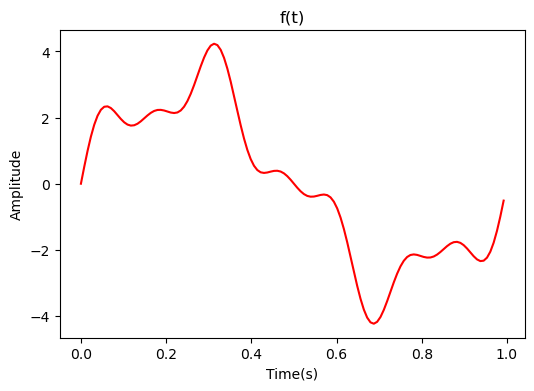

In [417]:
# sampling rate
# To make sure FFT can work, we change the sampling rate to the power of two
sr = 128
# time length
tl = 1.0
# sampling interval
ts = 1/sr

t = np.arange(0,tl,ts)

# Generate signal (f(t))
freq = [1, 4, 7]
x = 3*np.sin(2*np.pi*freq[0]*t) + np.sin(2*np.pi*freq[1]*t) + 0.5* np.sin(2*np.pi*freq[2]*t)

plt.figure(figsize = (6, 4))
plt.plot(t, x, 'r')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("f(t)")
plt.show()

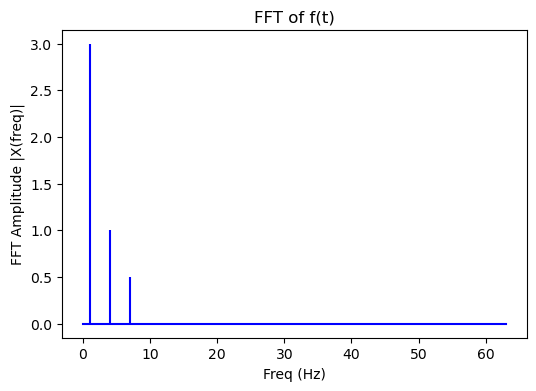

In [418]:
X=FFT(x, len(x))
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (6, 4))
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("FFT of f(t)")
plt.show()

If the output answer is different from ***Discrete Fourier Transform***, please check your code and make sure it is right.

#### 2.2 Zero-padding of Fast Fourier Transform (0.5 point)

What if we encounter the situation that the sequence number $N$ is not a power of two? A usually way is to add some zeros to the end of the sequence, and then use ***Fast Fourier Transform*** algorithm to calculate the result. This is called ***Zero-padding***.

In [419]:
# Please add zero-padding to FFT algorithm

# YOUR CODE HERE
def FFT_padding(x, N):
	# if the length is not the power of two
	# add zero-padding
	if not np.log2(N).is_integer():
		next_power_of_two = int(2**np.ceil(np.log2(N)))
		x = np.pad(x, (0, next_power_of_two - N), 'constant')

	if N == 1:
		return x
	else:
		# Fulfil Fast Fourier Transform

		# X is the result of Fast Fourier Transform
		X = FFT(x, len(x))

		return X
# END OF YOUR CODE

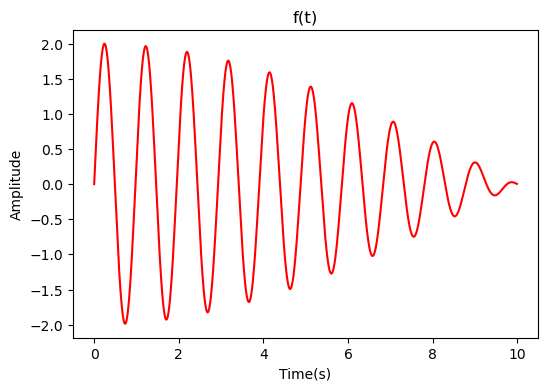

In [420]:
# Let's test the new FFT algorithm

# sampling rate
# We change the sampling rate
sr = 100
# time length
tl = 1000/sr
# sampling interval
ts = 1/sr

t = np.arange(0,tl,ts)

# Generate signal (f(t))
freq = [1, 1.05]
x = np.sin(2*np.pi*freq[0]*t) + np.sin(2*np.pi*freq[1]*t)

plt.figure(figsize = (6, 4))
plt.plot(t, x, 'r')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("f(t)")
plt.show()

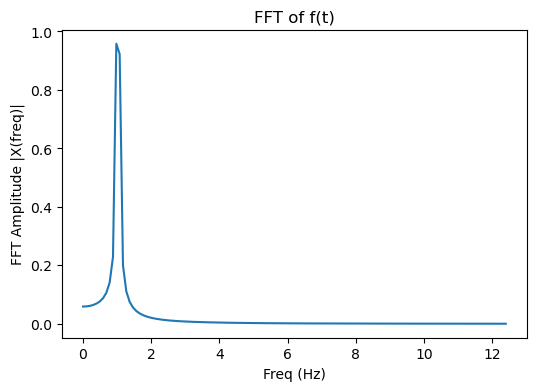

In [421]:
X=FFT_padding(x, len(x))

# calculate the frequency
N = len(X)
N = int(2**np.ceil(np.log2(N)))
n = np.arange(N)
T = N/sr
freq = n/T

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

X_oneside = X_oneside[:int(len(X_oneside)/4)]
f_oneside = f_oneside[:int(len(f_oneside)/4)]

plt.figure(figsize = (6, 4))
plt.plot(f_oneside, abs(X_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("FFT of f(t)")
plt.show()

If your code of `FFT_padding` is correct, then you will find that the output contains only one peak, it cannot separate the frequency component of $1\rm{Hz}$ and $1.05\rm{Hz}$. Why this happens? The sampling rate should be enough according to the Nyquist-Shannon sampling theorem. To answer this question, let's review the first step of ***Fast Fourier Transform*** algorithm, that is signal sampling.

The sampled sequence has three indicators: sampling rate ($f_s$), smapling number ($N$), and sampling time ($L$). Based on previous knowledge, the sampling interval in ***Discrete Fourier Transform*** is $\frac{1}{L}$, it is called **Frequency Resolution**, which is unchangable after the signal is sampled. For example, if a sigmal contains frequency components of $1 \rm{Hz}$ and $1.05 \rm{Hz}$, to separate these two frequency components in frequency domain, the sampling time $L$ should be at least $\frac{1}{0.05 \rm{Hz}}$, that is $20 \rm{s}$. So, we have to enlarge sampling time $L$.

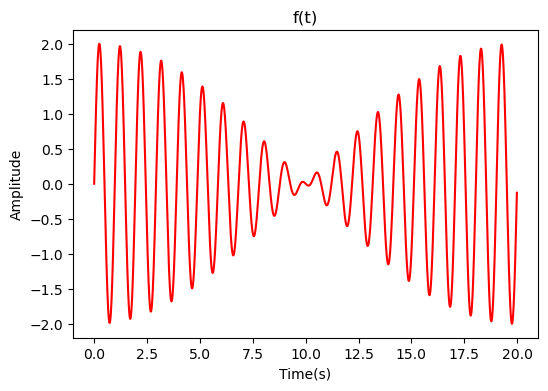

In [422]:
# sampling rate
sr = 100
# We change the time length
# time length
tl = 2000/sr
# sampling interval
ts = 1/sr

t = np.arange(0,tl,ts)

# Generate signal (f(t))
freq = [1, 1.05]
x = np.sin(2*np.pi*freq[0]*t) + np.sin(2*np.pi*freq[1]*t)

plt.figure(figsize = (6, 4))
plt.plot(t, x, 'r')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title("f(t)")
plt.show()

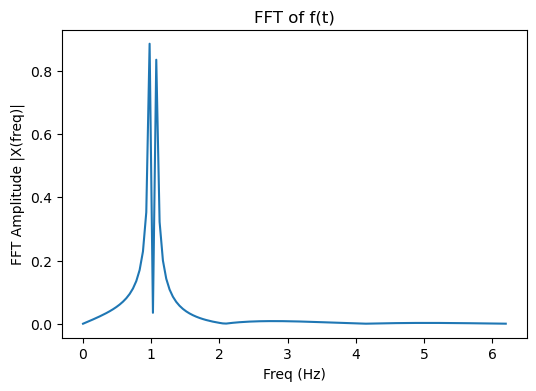

In [423]:
X=FFT_padding(x, len(x))

# calculate the frequency
N = len(X)
N = int(2**np.ceil(np.log2(N)))
n = np.arange(N)
T = N/sr
freq = n/T

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

X_oneside = X_oneside[:int(len(X_oneside)/8)]
f_oneside = f_oneside[:int(len(f_oneside)/8)]

plt.figure(figsize = (6, 4))
plt.plot(f_oneside, abs(X_oneside))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("FFT of f(t)")
plt.show()

Now you can find two peaks, which correspond to $1\rm{Hz}$ and $1.05\rm{Hz}$.

What's more, the number of sampling number $N$ determines the number of sampling points in the frequency domain, thus determining the visual resolution ($f_s/N$). So essentially, zero-padding is an operation that can interpolate the spectrum to make it visually smoother. So, this is why the frequency domain shown above has frequency components which do not exist in the signal.

It should be noticed that when you call `fft` function through python package `numpy` or others, the usual way of dealing non-power-of-two sequence is not using zero-padding. Instead, they use the FFT algorithm with an arbitrary number as the base.

## 3. WiFi Breathing Detection (3.5 points)

You might be curious that how WiFi can detect the breathing rate of a person. In this task, you will play with the collected WiFi sensing data, and use powerful ***Fourier Transform*** tool to calculate the breathing rate.

Let me explain in a simple way. Our experiment is done in a constant environment, and during the experiment, the most varied part of the environment was the movement of the subjects' chests when breathing. Thus, the received WiFi signal strength will change according to the movement of the chests, and of course, in a periodic way. This is how and why WiFi can be used to detect breathing rate of people.

In the following part, we will first give you a simple example of how to calculate the breathing rate in single-person scenario. Then, you need to solve of problem of changeing rate and multi-person scenarios.

**Scoring Rubric**
* 1) Frequency domain analysis: 2 points (1 point for each small task)
* 2) Make full use of the information in the data (subcarrier, link, etc.): 0.5 point
* 3) Beat answer: 1 point (0.5 point for each small task)
  
Please download the data 'wifisensing.pickle' from the link: https://connecthkuhk-my.sharepoint.com/personal/zhengxz_connect_hku_hk/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fzhengxz%5Fconnect%5Fhku%5Fhk%2FDocuments%2FWifisensing&ga=1

### 3.1 Data Structure

In [424]:
# importing some libraries we need in this part
import scipy.io
import numpy as np
import os
from collections import defaultdict, Counter
import pandas as pd
from matplotlib import pyplot as plt
import pickle

from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
	"""Add a vertical color bar to an image plot."""
	divider = axes_grid1.make_axes_locatable(im.axes)
	width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
	pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
	current_ax = plt.gca()
	cax = divider.append_axes("right", size=width, pad=pad)
	plt.sca(current_ax)
	return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [425]:
# Training set is released for constructing your solusion.
with open('wifisensing.pickle', 'rb') as handle:
	trainset = pickle.load(handle)

print(trainset.keys())

dict_keys(['ex_name', 'CSI', 'CSI_timestamp', 'CSI_info', 'groundtruth'])


**Description**:
* 'ex_name': The names of all experiments, including experimental setup information.
* 'CSI': A list of CSI series of all experiments.
* 'CSI_timestamp': A list of timestamp series corresponding to the CSI series.
* 'CSI_info': The basic information of the wifi device.
* 'groundtruth': The groundtruth of all experiments.

In [426]:
print('The experimental names:')
for experiment_name in trainset['ex_name']:
	print(experiment_name[:-4])

The experimental names:
breath_bpm12_ax200_cbw20_fs100_2x2_1_220928_163813
breath_bpm15_ax200_cbw20_fs100_2x2_1_220928_164837
breath_bpm20_ax200_cbw20_fs100_2x2_1_220928_165545
breath_bpm24-12_ax200_cbw20_fs100_2x2_1_220928_172548
breath_bpm12-24_ax200_cbw20_fs100_2x2_1_220928_171013
breath_bpm12-24-12_ax200_cbw20_fs100_2x2_1_220928_170213
breath_bpm15-20_multiperson_ax200_cbw20_fs100_2x2_1_220928_173606
breath_bpm15-24_multiperson_ax200_cbw20_fs100_2x2_1_220928_174240


You will find eight experiments in the data. And in this lab, we will only focus on two of them. We will take **breath_bpm15_ax200_cbw20_fs100_2x2_1_220928_164837** as an example, and leave **breath_bpm12-24_ax200_cbw20_fs100_2x2_1_220928_171013** and **breath_bpm15-24_multiperson_ax200_cbw20_fs100_2x2_1_220928_174240** for your experiment.

<font color=blue>**Description**: ex_name </font>
1. One person, controlled:
	- breath_bpm15_ax200_cbw20_fs100_2x2_1_220928_164837: The experiment of **one** person with a **controlled** breath rate, <font color=red>15 BMP</font> (breath per minute).
	- breath_bpm12-24_ax200_cbw20_fs100_2x2_1_220928_171013: The experiment of **one** person with a **controlled** breath rate, <font color=red>from 12 BMP to 24 BMP</font>.
2. Two people, controlled:
	- breath_bpm15-24_multiperson_ax200_cbw20_fs100_2x2_1_220928_174240: The experiment of **two** people with **controlled** breath rates, <font color=red>15 BMP and 24 BMP</font> respectively.

Let's move on and see what is inside each experiment.

The following picture shows how we collected the data.

![Experimental](Ex_Environment.jpg)

We used two transmitters and two receivers to build our WiFi system, which resulted in 4 links in our experiment space. To make it easy, we will only use the best link for your convenience (We will chose the best one for you.)

In [427]:
CSI = trainset['CSI']
CSI_timestamp = trainset['CSI_timestamp']
print('The data shape of the first CSI series: ', CSI[0].shape)
print('The data shape of the first CSI timestamp series: ', CSI_timestamp[0].shape)

The data shape of the first CSI series:  (6600, 245, 2, 2)
The data shape of the first CSI timestamp series:  (6600,)


**Description:** CSI and CSI_timestamp

One experiment has one CSI series and one CSI timestamp series. Furthermore, the type of each CSI series is numpy array with shape of (number_of_samples, number_of_subcarriers, number_of_transmit_antennas, number_of_receiving_antennas). And the element of each CSI timestamp series is represent the time that the corresponding CSI sample is captured. In the above example, the first CSI series has 6600 CSI sample, and each sample has 245 subcarriers from two Tx (Transmission Antennas) to two Rx (Receiving Antennas).

In [428]:
groundtruth = trainset['groundtruth']
print("The shape of the first groundtruth series: ", groundtruth[0].shape)

The shape of the first groundtruth series:  (66,)


In [429]:
csi4 = CSI[4]
groundtruth4 = groundtruth[4]

csi7 = CSI[7]
groundtruth7 = groundtruth[7]

# save the data as npy file
np.save('csi4.npy', csi4)
np.save('groundtruth4.npy', groundtruth4)

np.save('csi7.npy', csi7)
np.save('groundtruth7.npy', groundtruth7)

**Description:** groundtruth

Specifically, the ground-truth is captured by using the [OpenSignals respairation analysis device](https://www.pluxbiosignals.com/collections/opensignals/products/respiration-pzt-rip-analysis-add-on) and showing the breath rate every second with the unit of BMP (breath per minute). Based on the illustrated information of the first experiment, the shape of the ground-truth series is (66,) which means there are 66 recorded breath rates. Thus, the first experiment lasts for 66 seconds. By the way, since the sampling frequency of the CSI series is 100 Hz, the number of CSI samples in the first CSI series should be 6600 (refer to the previous block).

### 3.2 Data Visualization

In this section, we will visualize the CSI series by using the CSI series of **breath_bpm15_ax200_cbw20_fs100_2x2_1_220928_164837** as an example. The illustrations will be conducted in both the time domain and frequency domain. The entire ground-truth series will be represented in order to help you better comprehend what happened in these experiments.

In [430]:
# the amplitude of CSI
CSI_amplitude = np.abs(CSI[1])
# the phase of CSI
CSI_phase = np.angle(CSI[1])
print("the name of the first example: ", trainset['ex_name'][1][:-4])

the name of the first example:  breath_bpm15_ax200_cbw20_fs100_2x2_1_220928_164837


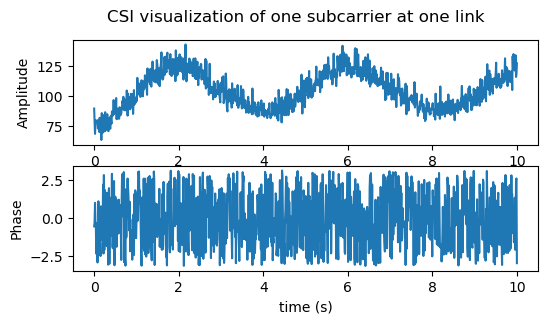

In [431]:
# the selected of Rx: 0 or 1
selected_Rx = 1
# the selected of Tx: 0 or 1
selected_Tx = 1
# the selected subcarriers from 245 subcarriers
selected_subcarrier = [10, 11]
# the visualized time range
time_range = [0, 1000]

visualize_amp = CSI_amplitude[time_range[0]:time_range[1],
							  selected_subcarrier[0]:selected_subcarrier[1],
							  selected_Rx, selected_Tx]
visualize_pha = np.unwrap(CSI_phase[time_range[0]:time_range[1],
						  selected_subcarrier[0]:selected_subcarrier[1],
						  selected_Rx, selected_Tx])
# Plot chart

time_axis = np.linspace(time_range[0], time_range[1], num=time_range[1])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 3))
fig.suptitle('CSI visualization of one subcarrier at one link ')

ax1.plot(time_axis / 100, visualize_amp)
ax1.set_ylabel('Amplitude')

ax2.plot(time_axis / 100, visualize_pha)
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Phase')

plt.show()

**Analysis**:
As shown in the above figure, the amplitude has a significant periodic pattern, that is, there are 2.5 cycles in ten seconds. In this way, there will be 15 breath cycles in one minute. This experiment is in the controlled mode, where one person maintains a 15 BPM breath rate all the time. Hence, the periodic pattern of the amplitude is related to the breathing rate. As for the phase, it does not show a clear periodic pattern as the amplitude. If we want to adopt the phase, we need to preprocess it by using phase cleaning method in [WiDance](https://dl.acm.org/doi/abs/10.1145/3025453.3025678).

The above picture shows only on subcarrier of CSI data. Actually, there are 245 subcarriers in the CSI data. And the following picture shows the amplitude and phse of all subcarriers in the CSI data. In your task, you can choose the "best" one for your breathing detection, or maybe you can utilize them all.

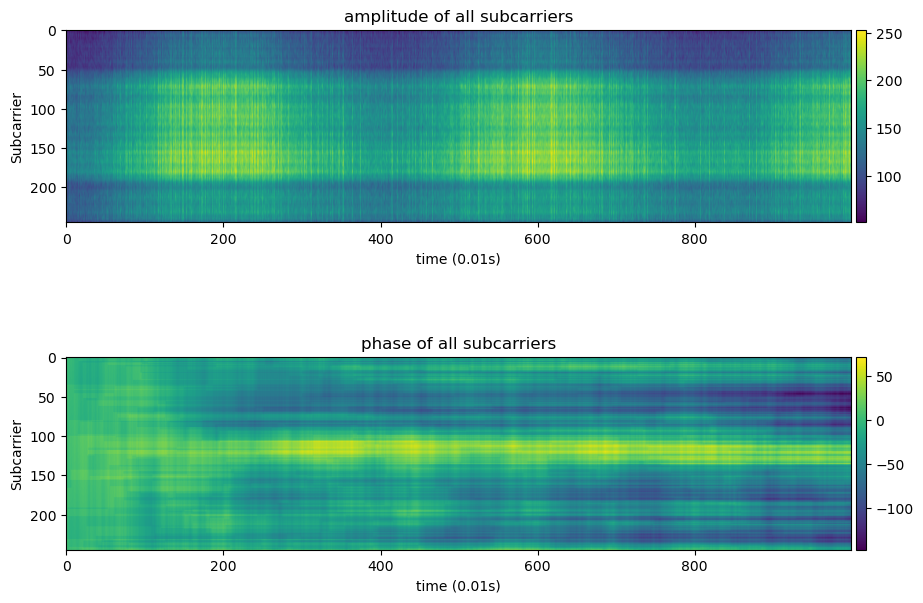

In [432]:
visualize_amp_allsubcarriers = CSI_amplitude[time_range[0]:time_range[1], :,
											 selected_Rx, selected_Tx]
visualize_pha_allsubcarriers = np.unwrap(CSI_phase[time_range[0]:time_range[1], :,
										 selected_Rx, selected_Tx], axis=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3))
plt.subplots_adjust(left=0.0, bottom=0.0, top=2, right=1)

im1 = ax1.imshow(visualize_amp_allsubcarriers.transpose(1, 0))
ax1.set_title('amplitude of all subcarriers')
ax1.set_xlabel('time (0.01s)')
ax1.set_ylabel('Subcarrier')
add_colorbar(im1)

im2 = ax2.imshow(visualize_pha_allsubcarriers.transpose(1, 0))
ax2.set_title('phase of all subcarriers')
ax2.set_xlabel('time (0.01s)')
ax2.set_ylabel('Subcarrier')
add_colorbar(im2)

plt.show()

### 3.3 Breathing Rate Calculation

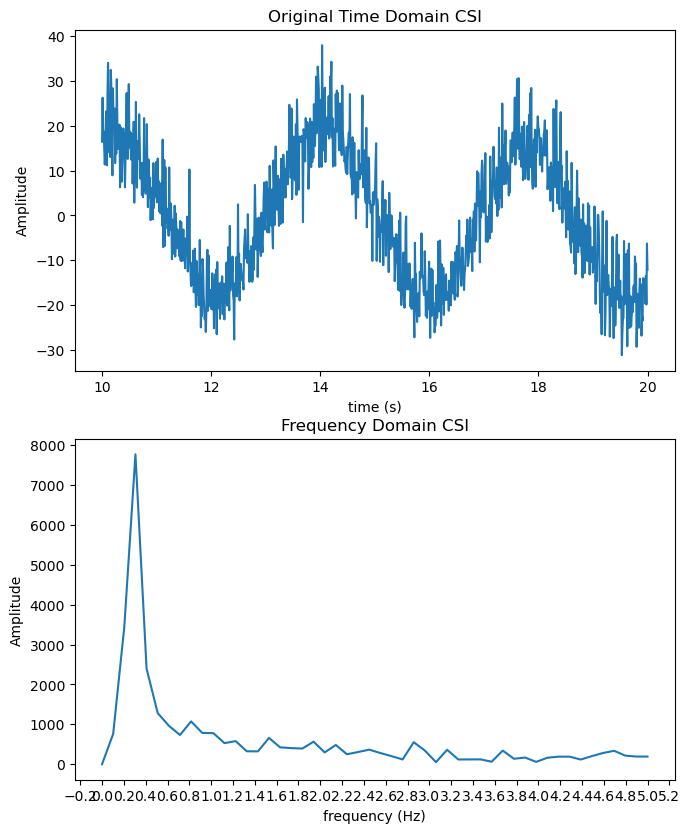

In [433]:
import matplotlib.ticker as ticker  # for axis locator setting
from scipy.fft import fft, fftfreq
# import the fast Fourier transformation
# using FFT on the CSI amplitude: transfer the time domain signal to freqency domain

# seleting one link, one subcrrier to show the fft
time_range = [1000, 2000]  # the visualized time range
num_samples = time_range[1] - time_range[0]  # the number of samples
sampling_rate = 100  # the CSI sampling rate: 100 Hz
selected_Rx = 1  # the selected of Rx: 0 or 1
selected_Tx = 1  # the selected of Tx: 0 or 1
selected_subcarrier = 15  # the selected subcarriers from 245 subcarriers

seleted_CSI_amp = CSI_amplitude[time_range[0]:time_range[1],
								selected_subcarrier, selected_Rx, selected_Tx]

# subtracting the mean value
seleted_CSI_amp = seleted_CSI_amp - np.mean(seleted_CSI_amp)

# calculating the fft
fft_CSI = fft(seleted_CSI_amp)

# visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 2.5))
plt.subplots_adjust(left=0.0, bottom=0.0, top=3, right=1)

time_axis = np.linspace(time_range[0], time_range[1], num=num_samples)
ax1.plot(time_axis / 100, seleted_CSI_amp)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('time (s)')
ax1.set_title("Original Time Domain CSI")

ax2.plot(np.linspace(0, 5, 50), np.abs(fft_CSI[:50]))
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.set_title("Frequency Domain CSI")

plt.show()

From ***Fast Fourier Transform*** result, you can find that the peak in frequency domain corresponds to the breathing rate ($15 \rm{bmp}$). It's just the result we expect.

Let's further draw the ground truth.

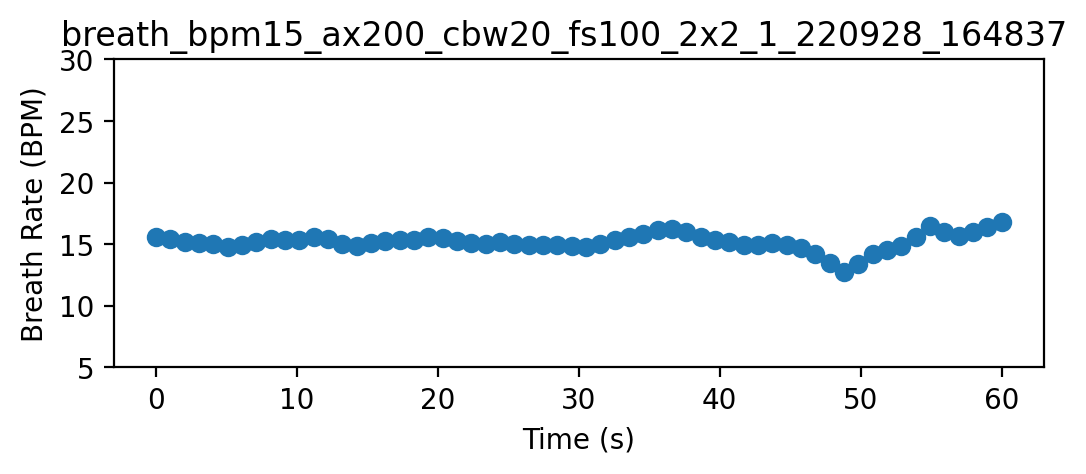

In [434]:
groundtruth = trainset['groundtruth']

def groundtruth_visualization(experiment_name, gt):
	fig, ax1 = plt.subplots(1, 1, figsize=(6, 2), dpi=200)
	fig.suptitle(experiment_name)

	if isinstance(gt, list):
		# for the two-user mode, there are two groundtruth series in the groundtruth file
		time_axis = np.linspace(0, len(gt[0]), num=len(gt[0]))
		ax1.scatter(time_axis, gt[0], label="User#1")
		ax1.scatter(time_axis, gt[1], label="User#2")
	else:
		# for the one-user mode
		time_axis = np.linspace(0, len(gt), num=len(gt))
		ax1.scatter(
			time_axis,
			gt,
		)
	ax1.set_xlabel('Time (s)')
	ax1.set_ylabel('Breath Rate (BPM)')
	ax1.set_ylim(5, 30)
	plt.show()

experiment_name = trainset['ex_name'][1][:-4]
groundtruth_visualization(experiment_name, groundtruth[1])

### 3.4 Changing Beat and Multi-Person Scenario

This task should be finished by yourself. You have to predict the breathing rate as the same length as ground truth, which means predict a value per second.

**Hints**:
* You may use STFT mentioned in the first lab.

In [435]:
# WiFi data for this task
task_csi1 = CSI[4][:, :, 1, 1]
task_csi2 = CSI[7][:, :, 1, 1]

# Ground truth for this task
task_ground_truth1 = groundtruth[4]
task_ground_truth2 = groundtruth[7]


Let's predict them one by one. Firstly let's focus on the changing breathing rate.

Text(0.5, 1.0, 'Frequency Domain CSI')

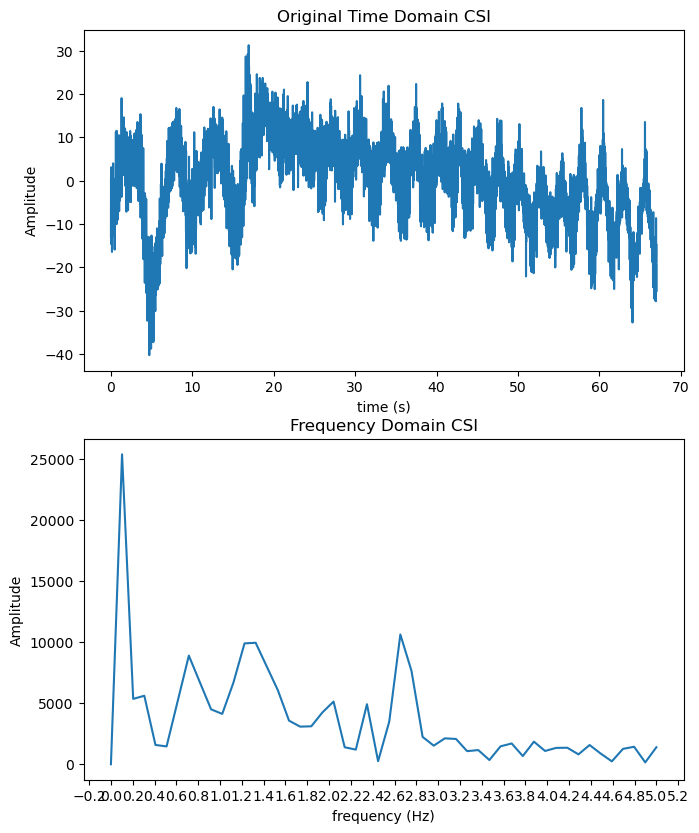

In [436]:
# YOUR CODE HERE: Part1
# code for csi1
from scipy import signal
# First, let's see the result in FFT and see the peaks
selected_subcarrier = 175
CSI_amplitude = np.abs(task_csi1)
# print(CSI_amplitude.shape)
selected_CSI_amp = CSI_amplitude[:, selected_subcarrier]
selected_CSI_amp = selected_CSI_amp - np.mean(selected_CSI_amp)

fft_CSI1 = fft(selected_CSI_amp)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 2.5))
plt.subplots_adjust(left=0.0, bottom=0.0, top=3, right=1)
time_range = [0, 6700]
num_samples = time_range[1] - time_range[0]
time_axis = np.linspace(time_range[0], time_range[1], num=num_samples)
ax1.plot(time_axis / 100, selected_CSI_amp)
# ax1.plot(selected_CSI_amp)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('time (s)')
ax1.set_title("Original Time Domain CSI")
ax2.plot(np.linspace(0, 5, 50), np.abs(fft_CSI1[:50]))
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.set_title("Frequency Domain CSI")
# Actually, fft for task1 seems useless. We will see the result in stft.

# To Be Continue...

***Analysis:***</br>
From FFT answer, we can see multiple peaks. As we've already known this piece of breathing rate is increasing, we cannot get useful information from FFT result. Due to the multiple peaks, we know the signal is changing.

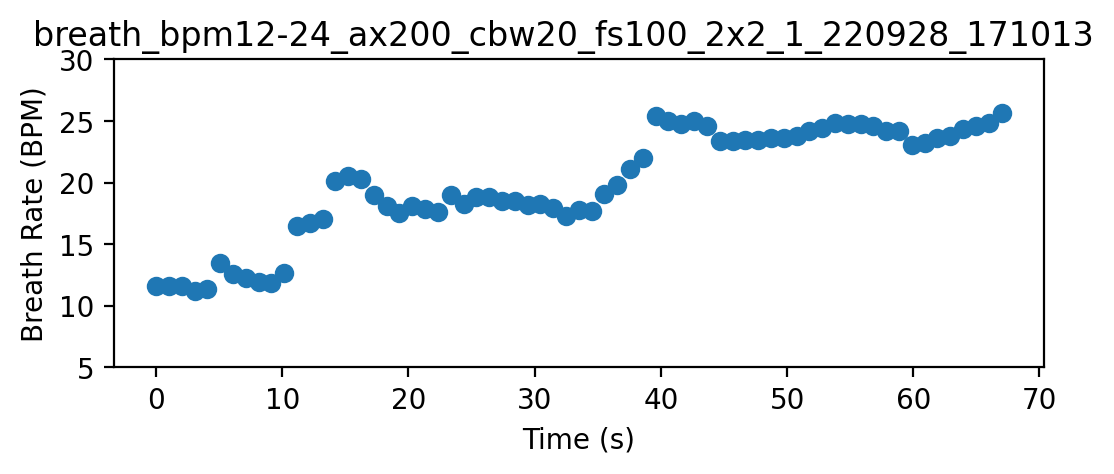

In [437]:
# Then, let's see the groundtruth
experiment_name = trainset['ex_name'][4][:-4]
groundtruth_visualization(experiment_name, task_ground_truth1)

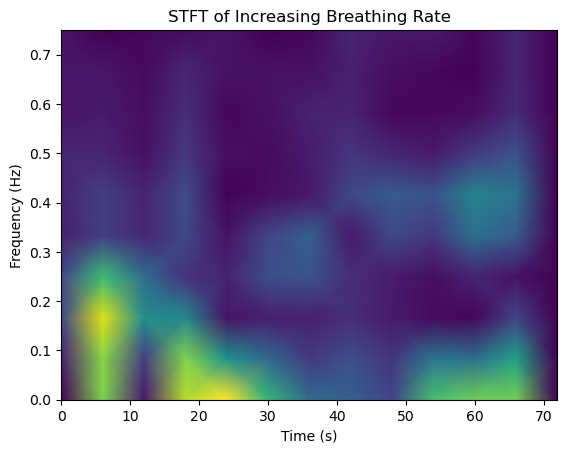

In [438]:
# Finally, let's see the result of STFT
from scipy import signal
import matplotlib.pyplot as plt

selected_subcarrier = 175
sampling_rate = 100  # the CSI sampling rate: 100 Hz

# Get signal
selected_CSI_amp = np.abs(task_csi1[:, selected_subcarrier])
selected_CSI_amp = selected_CSI_amp - np.mean(selected_CSI_amp)

f1, t1, Zxx1 = signal.stft(selected_CSI_amp,fs=sampling_rate, nperseg=1200)

plt.pcolormesh(t1, f1[:10], np.abs(Zxx1[:10,:]), shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT of Increasing Breathing Rate')
plt.show()
# END OF YOUR CODE: Part1

***Analysis:***</br>
From STFT answer, we can see an increasing line from 0.2Hz to 0.4Hz, which fits the groundtruth data well. Also we can see some noise at the bottom of the plot. We should address the noise to get the prediction we want.

Next, let's see the condition in multiple breathing rate.

Text(0.5, 1.0, 'Frequency Domain CSI')

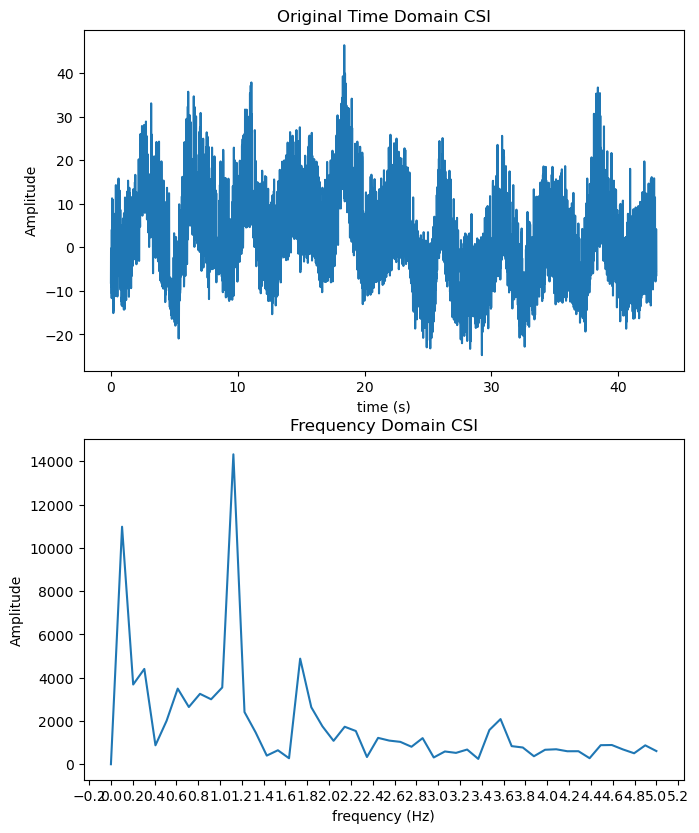

In [439]:
# YOUR CODE HERE: Part2
# code for csi2
from scipy import signal
# First, let's see the result in FFT and see the peaks
selected_subcarrier = 175
CSI_amplitude = np.abs(task_csi2)
# print(CSI_amplitude.shape)
selected_CSI_amp = CSI_amplitude[:, selected_subcarrier]
selected_CSI_amp = selected_CSI_amp - np.mean(selected_CSI_amp)

fft_CSI2 = fft(selected_CSI_amp)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 2.5))
plt.subplots_adjust(left=0.0, bottom=0.0, top=3, right=1)
time_range = [0, 4300]
num_samples = time_range[1] - time_range[0]
time_axis = np.linspace(time_range[0], time_range[1], num=num_samples)
ax1.plot(time_axis / 100, selected_CSI_amp)
# ax1.plot(selected_CSI_amp)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('time (s)')
ax1.set_title("Original Time Domain CSI")
ax2.plot(np.linspace(0, 5, 50), np.abs(fft_CSI2[:50]))
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('Amplitude')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax2.set_title("Frequency Domain CSI")


# To Be Continue...


    

***Analysis:***</br>
From FFT answer, we can see 3 main peaks with the frequencies of 0.1, 1.1, and 1.7. Consider the 0.1 Hz, which means an adult will breath 6 times per minute, we found it isn't reasonable. Then we should get rid of the 0.1 Hz data, and predict the breathing rate we want.

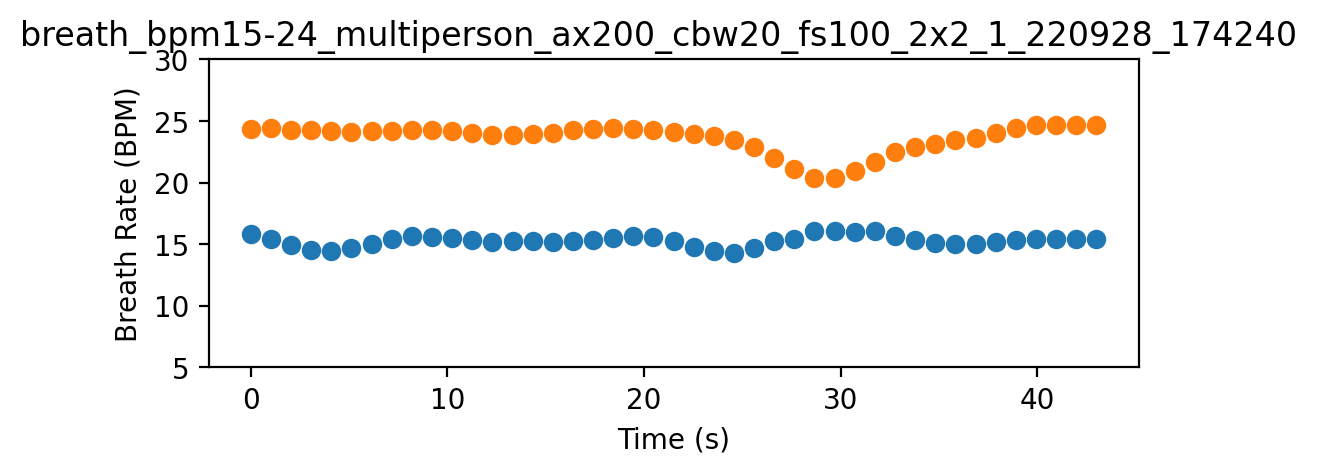

In [440]:
# Then, let's see the groundtruth
experiment_name = trainset['ex_name'][7][:-4]
groundtruth_visualization(experiment_name, task_ground_truth2)

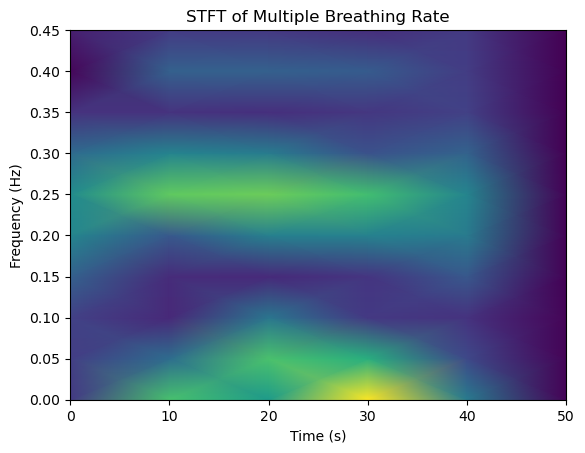

In [441]:
# Finally, let's see the result of STFT
from scipy import signal
import matplotlib.pyplot as plt

selected_subcarrier = 175
sampling_rate = 100  # the CSI sampling rate: 100 Hz

# Get signal
selected_CSI_amp = np.abs(task_csi2[:, selected_subcarrier])
selected_CSI_amp = selected_CSI_amp - np.mean(selected_CSI_amp)

f2, t2, Zxx2 = signal.stft(selected_CSI_amp,fs=sampling_rate, nperseg=2000)
plt.pcolormesh(t2, f2[:10], np.abs(Zxx2[:10,:]), shading='gouraud')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT of Multiple Breathing Rate')
plt.show()
# END OF YOUR CODE

***Analysis:***</br>
From STFT answer, we can see 3 lines which are near 0.05, 0.25, and 0.4Hz. From previous discussion, we have to get rid of the unreasonable data, so we will focus on 0.25Hz and 0.4 Hz line to predict the breathing rate. Btw, this two lines(0.25 and 0.4 Hz) fit the groundtruth data well also.

### 3.5 Evaluation

We will use Root Mean Squared Error (RMSE) to evaluate your result. The formula is as follows:

$$
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i-y_i)^2}
$$

where $\hat{y}_i$ is the estimated breathing rate, and $y_i$ is the ground truth.

In [442]:
# we will use rmse to calculate the similarity between your predictions and the ground truth
def rmse(predictions, targets):
	return np.sqrt(((predictions - targets) ** 2).mean())

In [443]:
# your prediction result for "breath_bpm12-24_ax200_cbw20_fs100_2x2_1_220928_171013"
# for task 1, fft is useless
from scipy.interpolate import interp1d
import random
# print(f1.shape)
# print(len(t1))
Zxx=np.abs(Zxx1)
# print(Zxx.shape)
# print(f1.shape)


original_pred_task1 = []
for i in range(len(t1)-1):
    # print("np.argmax(Zxx[:, i]) is ", np.argmax(Zxx[2:, i]))
    # print("np.max(Zxx[:, i]) = ", np.max(Zxx[2:, i]))
    # print("Zxx[:, i] = ", Zxx[:, i])
    original_pred_task1.append(50/len(f1)*(np.argmax(Zxx[2:, i])+2)) # slice 2:-1, then +2 to avoid high amplitude below 0.2 Hz
# print(original_pred_task1)

pred_task1=[]


# For here, we add adjency number to the list.
# Since our array length is 13 and the ground truth length is 67, we had to expand our array to fit the 67-length array.
# We can use adjency value to predict frequency near a specific timestamp, which means, we use the value of 6 second 5 times to predict 1-5 time period.
# We can add a "noise" to make the prediction natural. 


max_noise = 0.02
min_noise = -0.02


# For a STABLE answer, we can get rid of the "noise" value, which means max_noise = 0, min_noise = 0. I comment the 0 condition.
# max_noise = min_noise=0
for i in range(len(original_pred_task1)):
    for _ in range(5):
        # noise: (-0.02, 0.02)
        noise = random.uniform(min_noise, max_noise)
        pred_task1.append(original_pred_task1[i]+noise)
for i in range(67-len(pred_task1)):
    noise = random.uniform(min_noise, max_noise)
    pred_task1.append(pred_task1[-1]+noise)
# print(len(pred_task1))
# print(pred_task1)


# Then, turn Hz to BMP
for i in range(len(pred_task1)):
    pred_task1[i]*=60
# print(pred_task1)



# your prediction result for "breath_bpm15-24_multiperson_ax200_cbw20_fs100_2x2_1_220928_174240"
pred_task2_person1=[]
pred_task2_person2=[]
Zxx=np.abs(Zxx2)
original_pred_task2_p1 = []
original_pred_task2_p2 = []
for i in range(len(t2)-1):
    # print("np.argmax(Zxx[8:, i]) is ", np.argmax(Zxx[8:, i]))
    # print("np.max(Zxx[8:, i]) = ", np.max(Zxx[8:, i]))
    # print("Zxx[:, i] = ", Zxx[:, i])
    original_pred_task2_p1.append(50/len(f2)*(np.argmax(Zxx[2:, i])+2)) # slice 2:-1, then +2 to avoid high amplitude below 0.2 Hz
    original_pred_task2_p2.append(50/len(f2)*(np.argmax(Zxx[8:, i])+8)) # slice 2:-1, then +2 to avoid high amplitude below 0.3 Hz
# print(len(original_pred_task2_p1))
# print(len(original_pred_task2_p2))
# print(len(task_ground_truth2[0]))# =43

max_noise = 0.01
min_noise = -0.01
for i in range(len(original_pred_task2_p1)):
    for _ in range(8):
        # noise: (-0.01, 0.01)
        noise = random.uniform(min_noise, max_noise)
        pred_task2_person1.append(original_pred_task2_p1[i]+noise)
        pred_task2_person2.append(original_pred_task2_p2[i]+noise)
for i in range(43-len(pred_task2_person1)):
    noise = random.uniform(min_noise, max_noise)
    pred_task2_person1.append(pred_task2_person1[-1]+noise)
for i in range(43-len(pred_task2_person2)):
    noise = random.uniform(min_noise, max_noise)
    pred_task2_person2.append(pred_task2_person2[-1]+noise)
for i in range(len(pred_task2_person1)):
    pred_task2_person1[i]*=60
    pred_task2_person2[i]*=60

# calculate the rmse
rmse1 = rmse(task_ground_truth1, pred_task1)
rmse2_1 = rmse(task_ground_truth2[0], pred_task2_person1)
rmse2_2 = rmse(task_ground_truth2[1], pred_task2_person2)
print("The rmse of task1 is: ", rmse1)
print("The rmse of task2 for person1 is: ", rmse2_1)
print("The rmse of task2 for person2 is: ", rmse2_2)

The rmse of task1 is:  3.9719889623373157
The rmse of task2 for person1 is:  0.596107802934253
The rmse of task2 for person2 is:  1.7357869831157022


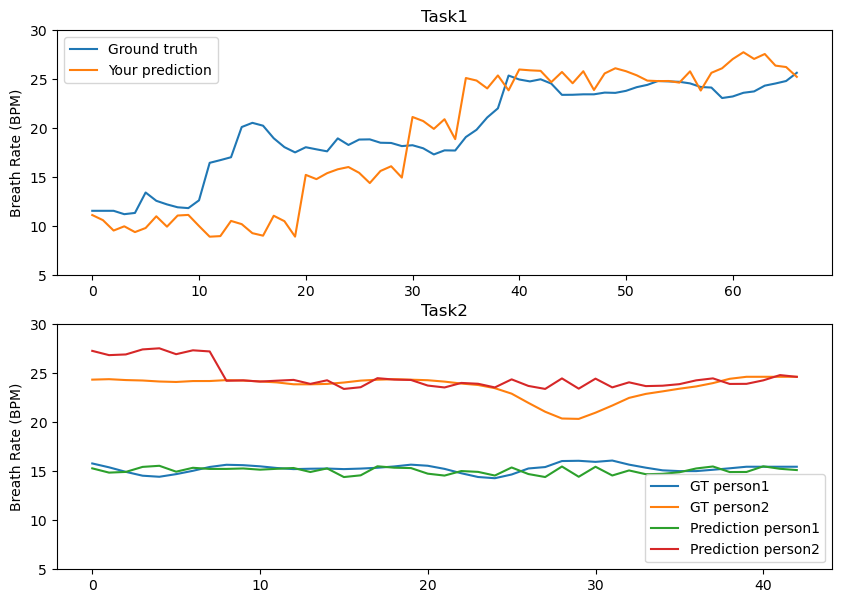

In [444]:
# plot the ground truth and your prediction in these two tasks
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

ax1.title.set_text('Task1')
ax1.plot(task_ground_truth1, label="Ground truth")
ax1.plot(pred_task1, label="Your prediction")
ax1.set_ylabel('Breath Rate (BPM)')
ax1.set_ylim(5, 30)
ax1.legend()

ax2.title.set_text('Task2')
ax2.plot(task_ground_truth2[0], label="GT person1")
ax2.plot(task_ground_truth2[1], label="GT person2")
ax2.plot(pred_task2_person1, label="Prediction person1")
ax2.plot(pred_task2_person2, label="Prediction person2")
ax2.set_ylabel('Breath Rate (BPM)')
ax2.set_ylim(5, 30)
ax2.legend()